In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h2>Exploring the data</h2>

In [4]:
df.shape

(303, 14)

In [5]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

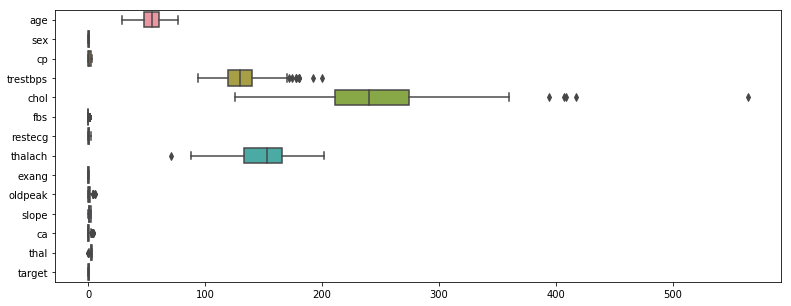

In [11]:
plt.figure(figsize=(13,5))
sns.boxplot(data=df,orient='h')
plt.show()

In [13]:
X=df.drop('target',axis=1)

In [15]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [16]:
y=df['target']

<h2>Splitting of data for training and testing</h2>

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)

In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3


In [24]:
y_train

290    0
103    1
62     1
191    0
197    0
123    1
202    0
187    0
76     1
231    0
292    0
137    1
302    0
296    0
68     1
220    0
36     1
262    0
12     1
287    0
283    0
58     1
79     1
184    0
75     1
109    1
22     1
89     1
251    0
203    0
      ..
217    0
16     1
72     1
253    0
37     1
49     1
108    1
172    0
226    0
8      1
107    1
205    0
294    0
90     1
9      1
139    1
101    1
260    0
158    1
80     1
255    0
61     1
35     1
14     1
210    0
281    0
102    1
152    1
96     1
293    0
Name: target, Length: 227, dtype: int64

<h2>Standard Scaler</h2>

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
std=StandardScaler()

In [27]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [28]:
X_train_std

array([[ 0.78674222,  0.6746319 , -0.91562611, ...,  1.03220984,
         0.27942068,  1.05009445],
       [-1.34735791,  0.6746319 ,  1.06387033, ..., -2.33918057,
        -0.6964023 ,  1.05009445],
       [-0.22414731,  0.6746319 ,  2.05361855, ..., -0.65348537,
        -0.6964023 , -2.17114122],
       ...,
       [ 1.1237054 ,  0.6746319 ,  2.05361855, ..., -0.65348537,
        -0.6964023 ,  1.05009445],
       [ 0.89906328, -1.48228982, -0.91562611, ..., -0.65348537,
        -0.6964023 , -0.56052339],
       [ 1.46066858,  0.6746319 ,  1.06387033, ..., -0.65348537,
        -0.6964023 ,  1.05009445]])

<h2>Train our Model</h2>

<h2>Logistic Regression</h2>

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr=LogisticRegression()

In [31]:
lr.fit(X_train_std,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
predict=lr.predict(X_test_std)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,predict)*100

82.89473684210526

In [35]:
predict

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [36]:
y_test

136    1
117    1
265    0
244    0
282    0
142    1
264    0
268    0
110    1
241    0
199    0
130    1
1      1
50     1
105    1
64     1
129    1
95     1
295    0
122    1
156    1
222    0
237    0
25     1
82     1
259    0
182    0
146    1
115    1
263    0
      ..
195    0
47     1
160    1
55     1
153    1
11     1
31     1
186    0
73     1
116    1
208    0
78     1
159    1
301    0
100    1
135    1
242    0
254    0
33     1
232    0
38     1
121    1
267    0
155    1
150    1
200    0
175    0
60     1
0      1
92     1
Name: target, Length: 76, dtype: int64

<h2>Decision Tree</h2>

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt=DecisionTreeClassifier()

In [39]:
dt.fit(X_train_std,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
predictt=dt.predict(X_test_std)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,predictt)*100

75.0

<h2>Random Forest Tree</h2>

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rft=RandomForestClassifier()

In [45]:
rft.fit(X_train_std,y_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
predicttt=rft.predict(X_test_std)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,predicttt)

0.8552631578947368

<h2>KNN - K Nearest Neighbours</h2>

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn=KNeighborsClassifier(n_neighbors=6)

In [89]:
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [90]:
predictttt=knn.predict(X_test_std)

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(y_test,predictttt)*100

81.57894736842105